<a href="https://colab.research.google.com/github/Riza-sunesara/YoungDevInterns_Artificial_Intelligence_Tasks/blob/main/Basic_Tasks/Basic_Task01/Basic_Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecting to Github**


In [1]:
!git clone https://github.com/Riza-sunesara/YoungDevInterns_Artificial_Intelligence_Tasks.git

Cloning into 'YoungDevInterns_Artificial_Intelligence_Tasks'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 21.93 MiB | 12.63 MiB/s, done.


In [2]:
%cd YoungDevInterns_Artificial_Intelligence_Tasks/Basic_Tasks/Basic_Task01/

/content/YoungDevInterns_Artificial_Intelligence_Tasks/Basic_Tasks/Basic_Task01


# **Working on Task 01**

## **Retrieving the dataset from github and implementing model**


In [17]:
# Importing all libraries required
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [36]:
# Raw URL for the csv file
url = 'https://raw.githubusercontent.com/Riza-sunesara/YoungDevInterns_Artificial_Intelligence_Tasks/refs/heads/main/Basic_Tasks/Basic_Task01/used_cars.csv'

# Read the csv file from the URL
data = pd.read_csv(url)

# Display the first few rows to verify
data.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [37]:
# checking for empty values in mileage and price columns
# Mileage column
mileage_empty = data['milage'].isnull().sum()
print(f"No. of rows Empty in Mileage: {mileage_empty}")
# Price column
price_empty = data['price'].isnull().sum()
print(f"No. of rows Empty in Price: {price_empty}")

No. of rows Empty in Mileage: 0
No. of rows Empty in Price: 0


In [38]:
# Converting the milage and price column numeric i.e., removing 'mi', ',' and '$ sign from these columns and changing datatypes'

# Remove "mi." and commas from milage, then convert to float values
data['milage'] = data['milage'].replace({'mi.': '', ',': ''}, regex=True).astype(float)

# Removing "$" and commas from price, then convert to float values
data['price'] = data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Verify the changes
print(data['milage'].dtype)
print(data[['milage', 'price']].head())

float64
    milage    price
0  51000.0  10300.0
1  34742.0  38005.0
2  22372.0  54598.0
3  88900.0  15500.0
4   9835.0  34999.0


Choosing "milage" and "price" as the feature and target variable as mileage has a direct influence on the price of the car. Cars with fewer miles generally have higher prices. So we can predict the price of a car based on its mileage.

In [39]:
# Using data labeling X and y for prediction

X=data[['milage']]
y=data['price']

In [40]:
# Split the training and testing data and apply model
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
# Predicting:
y_pred = model.predict(X_test)

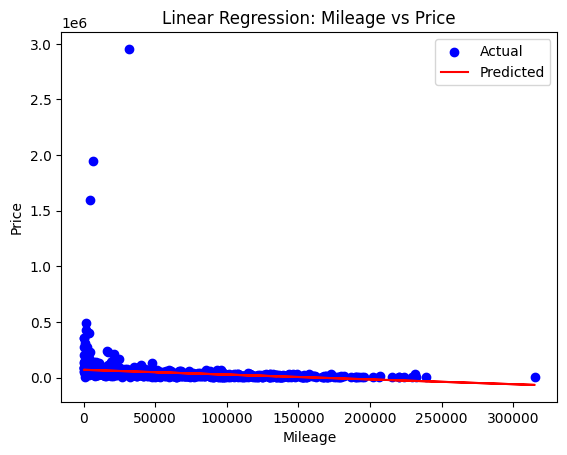

In [42]:
# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Linear Regression: Mileage vs Price')
plt.legend()
plt.show()